In [1]:
import cv2
import matplotlib.pyplot as plt

Import required libraries for the task


*   cv2 for video proccesing
*   matplotib to plot the graph of heart rate



In [2]:
cap = cv2.VideoCapture('anuj.mp4')

input of captured video to process

In [3]:
pixels_red = []
pixels_green = []
pixels_blue = []
points_x = []

creating list to store pixel values of RGB channel 

In [4]:
while True:
  try:
      ret, frame = cap.read()
      B, G, R = cv2.split(frame)
      r = R.flatten()
      g = G.flatten()
      b = B.flatten()
      average_red = sum(r) / len(r)
      pixels_red.append(average_red)
      #cv2.imshow('Original', frame)
      #cv2.imshow('Channel_Red', R)
      #cv2.imshow('Channel_Blue', B)
      #cv2.imshow('Channel_Green', G)
      k = cv2.waitKey(1) & 0xFF
      if k == 27:
            break
  except Exception as e:
        print(e)
        cv2.destroyAllWindows()
        break

not enough values to unpack (expected 3, got 0)


In [5]:
pixels_red_new = []
index = 0
pixels_red = pixels_red[120:]

In [6]:
print(pixels_red)

[207.40174430031448, 207.49509876179246, 207.82392639544025, 207.71082448899372, 207.63704549921383, 205.37734375, 201.6221133058176, 200.6674233490566, 203.20635564072327, 205.79826061320756, 207.497268081761, 208.04038178066037, 208.03193789308176, 207.63243170204402, 207.4345297759434, 207.10966981132074, 206.97994054638366, 207.23465998427673, 207.60145931603773, 207.49642541273585, 207.62002751572328, 207.49016067216982, 206.07135416666668, 202.1222238600629, 200.49132763364778, 202.03438974056604, 205.15741450471697, 206.92240320361634, 207.7331220518868, 207.80139052672956, 207.71622444968554, 207.31556603773586, 207.2076233294025, 206.82776139937107, 207.19428803066037, 207.32547661163522, 207.39478675314464, 207.4893008058176, 207.4469069378931, 205.46966637185534, 201.5840138561321, 200.1910573899371, 202.86403301886793, 205.53989042845913, 207.11420253537736, 207.7733122051887, 207.7936296187107, 207.5504299331761, 207.33199685534592, 207.08556161556604, 207.0966366941824, 2

Creating new list to store new values of pixels in red channel and skipping some inital by indexing values to get consistend data

In [7]:
for i in pixels_red:
    if index != 0 and index < len(pixels_red) - 1:
        pixels_red_new.append(pixels_red[index - 1] * 0.85 + pixels_red[index] * 0.1 + pixels_red[index + 1] * 0.05)
    index += 1
print(len(pixels_red_new))
pixels_red_new.append(pixels_red_new[len(pixels_red_new) - 1])
pixels_red_new.append(pixels_red_new[len(pixels_red_new) - 1])


381


Creating low pass filter to apply on the value of red colored pixels to smoothen the curve of the graph. The values of filter can be changed as per requirement. 

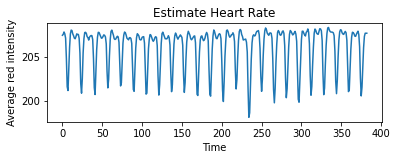

In [8]:
for i in range(0, len(pixels_red)):
    points_x.append(i)
plt.subplot(2, 1, 2)  
plt.plot(points_x, pixels_red_new)
plt.title("Estimate Heart Rate")
plt.xlabel('Time')
plt.ylabel('Average red intensity')
plt.show()


Ploting the graph where Y-axis shows the average value of light intensity of red colored pixels and x- axis shows the time.

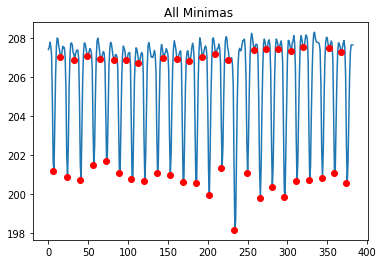

In [9]:
index = 0
Min = []
Min_index = []
while True:
    if index + 4 < len(pixels_red_new):
        
        left_left = pixels_red_new[index]
        left = pixels_red_new[index + 1]
        mid = pixels_red_new[index + 2]
        right = pixels_red_new[index + 3]
        right_right = pixels_red_new[index + 4]
        
        if (left_left > left) and (left > mid) and (right > mid) and (right_right > right):
            Min_index.append(index + 1)
            Min.append(mid)
    if index >= len(pixels_red_new):
        break
    index += 1

plt.plot(points_x, pixels_red_new)
plt.title("All Minimas ")
plt.plot(Min_index, Min, 'o', color='red')
plt.show()



Indicating minimum values of graph where middle vlue is minima point and two consecutive values after that should be the greater value, after fulfiling this condition only the middle value can be identified as minima value. And if the condition is satisfried append the value of minima in the list.

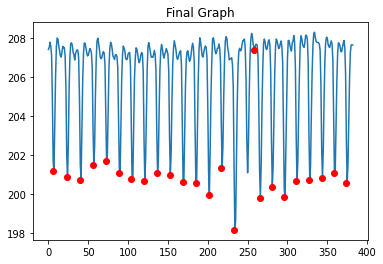

In [10]:
index = 0
for i in Min:
    if i != Min[len(Min) - 1]:
        if Min[index + 1] > Min[index] + 1.7:
            Min.pop(index + 1)
            Min_index.pop(index + 1)
    index += 1

plt.plot(points_x, pixels_red_new)
plt.title("Final Graph")
plt.plot(Min_index, Min, 'o', color='red')
plt.show()

In some areas t eas observed that in one complete cycle there were two minimas detected and it was showig double values to original. So now it will remove the minima which have higher value then the neighbour value to get actual starting and end point of a wave.
 

In [11]:
frame_rate=cap.get(cv2.CAP_PROP_FPS)

Heart_rate = (len(Min_index) * 60) / (len(pixels_red_new) /frame_rate )
print("THE HEART RATE IS: ", Heart_rate)


THE HEART RATE IS:  112.73770102687622


Now we have the number of minimas and also number of frames and here the FPS(frame per second) of input video is fixed so by simple calculation we can calculate Heart rate.